In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iquitos_dataset = pd.read_csv("dengueData/Iquitos/iquitos_training_data.csv")
print(iquitos_dataset.head())
print("Number of observations: ", len(iquitos_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  2000/2001            1      2000-07-01            0            0   
1  2000/2001            2      2000-07-08            0            0   
2  2000/2001            3      2000-07-15            0            0   
3  2000/2001            4      2000-07-22            0            0   
4  2000/2001            5      2000-07-29            0            0   

   denv3_cases  denv4_cases  other_positive_cases  total_cases  
0            0            0                     0            0  
1            0            0                     0            0  
2            0            0                     0            0  
3            0            0                     0            0  
4            0            0                     0            0  
Number of observations:  468


In [3]:
iquitos_cases = iquitos_dataset["total_cases"].values
print(iquitos_cases.shape)

(468,)


In [4]:
split_index = int(len(iquitos_cases)* 0.7)
window_size = 4
train = iquitos_cases[:split_index+window_size]
test = iquitos_cases[split_index+window_size:]

print(train.shape)
print(test.shape)

(331,)
(137,)


E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=5.902861, expected=2.000000
predicted=2.228467, expected=13.000000
predicted=12.513664, expected=10.000000
predicted=6.518842, expected=5.000000
predicted=6.087190, expected=2.000000
predicted=5.348053, expected=0.000000
predicted=1.383399, expected=1.000000
predicted=2.281620, expected=0.000000
predicted=0.505902, expected=14.000000
predicted=11.540929, expected=6.000000
predicted=2.379971, expected=10.000000
predicted=10.535056, expected=5.000000
predicted=5.553032, expected=12.000000
predicted=10.691472, expected=9.000000
predicted=8.319946, expected=5.000000
predicted=5.909831, expected=11.000000
predicted=12.056558, expected=2.000000
predicted=1.671136, expected=6.000000
predicted=8.207460, expected=7.000000
predicted=6.654839, expected=6.000000
predicted=4.925092, expected=5.000000
predicted=6.257024, expected=9.000000
predicted=8.272877, expected=5.000000
predicted=4.431952, expected=8.000000
predicted=8.495225, expected=3.000000
predicted=3.603165, expected=4.000000
p

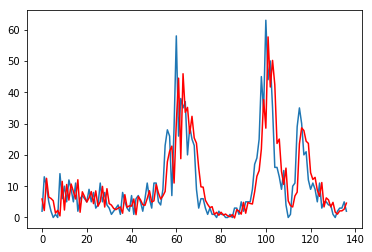

In [5]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()